In [6]:
import pandas as pd
import json
import numpy as np
import statistics
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.stats
import random
from collections import Counter

df = pd.read_json('wikidata_w_year.json')

In [7]:
# separate score values into different columns
first_round_split = df['First round'].str.split(r'\(', expand=True)
first_score_first_round  = first_round_split[1].str.split(r'+', expand=True)

#remove trailing parentheses
first_score_first_round[1] = first_score_first_round[1].str.replace("\)$", "")
first_score_first_round[2] = first_score_first_round[2].str.replace("\)$", "")

# finals split
finals_split = df['Finals'].str.split(r'\(', expand=True)
first_score_final  = finals_split[1].str.split(r'+', expand=True)

#remove trailing parentheses
first_score_final[1] = first_score_final[1].str.replace("\)$", "")
first_score_final[2] = first_score_final[2].str.replace("\)$", "")

In [9]:
# add split scores back to df
df['First Round Total'] = first_round_split[0]
df['First Round Score 1'] = first_score_first_round[0]
df['First Round Score 2'] = first_score_first_round[1]
df['First Round Score 3'] = first_score_first_round[2]

df['Final Round Total'] = finals_split[0]
df['Final Round Score 1'] = first_score_final[0]
df['Final Round Score 2'] = first_score_final[1]
df['Final Round Score 3'] = first_score_final[2]

In [11]:
df['First Round Score 1'] = pd.to_numeric(df['First Round Score 1'])
df['First Round Score 2'] = pd.to_numeric(df['First Round Score 2'])
df['First Round Score 3'] = pd.to_numeric(df['First Round Score 3'])

df['Final Round Score 1'] = pd.to_numeric(df['Final Round Score 1'])
df['Final Round Score 2'] = pd.to_numeric(df['Final Round Score 2'])
df['Final Round Score 3'] = pd.to_numeric(df['Final Round Score 3'])

ValueError: Unable to parse string "47)" at position 25

In [50]:
# create graphs of first_round scores

# print(df['First Round Total'].value_counts())
# hist_score_1 = df.hist(column=['First Round Score 1'], bins=60)
# hist_score_2 = df.hist(column=['First Round Score 2'], bins=60)
# hist_score_3 = df.hist(column=['First Round Score 3'], bins=60)
# hist_score_total = df.hist(column=['First Round Score 1', 'First Round Score 2', 'First Round Score 3'], bins=60)

# compression_opts = dict(method='zip', archive_name = 'out.csv')
# df.to_csv('scores_df.zip', index=False, compression=compression_opts)

# add all the first round data to one column
all_first_round_scores = []
all_first_round_scores += df['First Round Score 1'].values.tolist()
all_first_round_scores += df['First Round Score 2'].values.tolist()
all_first_round_scores += df['First Round Score 3'].values.tolist()
# print(Counter(all_first_round_scores))

In [51]:
# get variance of years 2000 - 2022
previous_scoring_method = df.loc[(df['Year'] <= 2022) & (df['Year'] >= 2000)]
print("Variance of first round first scores: ", np.var(previous_scoring_method['First Round Score 1']))
print("Variance of first round second scores: ", np.var(previous_scoring_method['First Round Score 2']))
print("Mean of first round first scores: ", np.mean(previous_scoring_method['First Round Score 1']))
print("Mean of first round second scores: ", np.mean(previous_scoring_method['First Round Score 2']))

print("Variance of final first scores: ", np.var(previous_scoring_method['Final Round Score 1']))
print("Variance of final round second scores: ", np.var(previous_scoring_method['Final Round Score 2']))
print("Mean of final round first scores: ", np.mean(previous_scoring_method['Final Round Score 1']))
print("Mean of final round second scores: ", np.mean(previous_scoring_method['Final Round Score 2']))

# add all values of scores into an np array
previous_scoring_method_all_scores = pd.DataFrame()
previous_scoring_method_all_scores['All Scores'] = previous_scoring_method['First Round Score 1']
previous_scoring_method_all_scores = pd.concat([previous_scoring_method_all_scores['All Scores'], previous_scoring_method['First Round Score 2'], previous_scoring_method['First Round Score 3'], previous_scoring_method['Final Round Score 1'], previous_scoring_method['Final Round Score 2'], previous_scoring_method['Final Round Score 3']], ignore_index=True)
# prev_all_scores_hist = plt.hist(previous_scoring_method_all_scores, bins=30, density=True, cumulative=True)

previous_scoring_method_all_scores = previous_scoring_method_all_scores.dropna()

print("Mean of all first method scores: ", np.mean(previous_scoring_method_all_scores))
print("Median of all first method scores: ", np.median(previous_scoring_method_all_scores))
print("Variance of all first method scores: ", np.var(previous_scoring_method_all_scores))

fig = px.histogram(previous_scoring_method_all_scores, nbins=30, histnorm='percent', labels = {"value": "Dunk Score"}, title="All Dunk Scores from 2000 - 2022")
fig.show()

Variance of first round first scores:  22.568858131487897
Variance of first round second scores:  36.82131487889275
Mean of first round first scores:  43.8235294117647
Mean of first round second scores:  44.04705882352941
Variance of final first scores:  25.16555555555556
Variance of final round second scores:  38.18222222222223
Mean of final round first scores:  44.63333333333333
Mean of final round second scores:  45.13333333333333
Mean of all first method scores:  44.15677966101695
Median of all first method scores:  45.0
Variance of all first method scores:  30.852538781959254


In [52]:
# get variance of years 2023
new_scoring_method = df.loc[df['Year'] == 2023]
print("Variance of first round first scores: ", np.var(new_scoring_method['First Round Score 1']))
print("Variance of first round second scores: ", np.var(new_scoring_method['First Round Score 2']))
print("Mean of first round first scores: ", np.mean(new_scoring_method['First Round Score 1']))
print("Mean of first round second scores: ", np.mean(new_scoring_method['First Round Score 2']))

print("Variance of final first scores: ", np.var(new_scoring_method['Final Round Score 1']))
print("Variance of final round second scores: ", np.var(new_scoring_method['Final Round Score 2']))
print("Mean of final round first scores: ", np.mean(new_scoring_method['Final Round Score 1']))
print("Mean of final round second scores: ", np.mean(new_scoring_method['Final Round Score 2']))

# add all values of scores into an np array
new_scoring_method_all_scores = pd.DataFrame()
new_scoring_method_all_scores['All Scores'] = new_scoring_method['First Round Score 1']
new_scoring_method_all_scores = pd.concat([new_scoring_method_all_scores['All Scores'], new_scoring_method['First Round Score 2'], new_scoring_method['Final Round Score 1'], new_scoring_method['Final Round Score 2']], ignore_index=True)
new_scoring_method_all_scores = new_scoring_method_all_scores.dropna()

print("Variance of all second method scores: ", np.var(new_scoring_method_all_scores))

fig = px.histogram(new_scoring_method_all_scores, nbins=30, labels = {"value": "Dunk Score"}, title="New Scoring Method Score Distribution")
fig.show()

all_scores = pd.DataFrame()
all_scores = pd.concat([previous_scoring_method_all_scores, new_scoring_method_all_scores], ignore_index=True)
all_scores = all_scores.dropna()

fig = px.histogram(all_scores, nbins=30, histnorm='percent', labels = {"value": "Dunk Score"}, title="2000 - 2023 Score Distributions")
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        # tick0 = 0.5,
        dtick = 1    
        )
)
fig.show()

Variance of first round first scores:  2.3274999999999992
Variance of first round second scores:  1.1674999999999969
Mean of first round first scores:  47.55
Mean of first round second scores:  48.55
Variance of final first scores:  0.3600000000000017
Variance of final round second scores:  0.15999999999999887
Mean of final round first scores:  49.4
Mean of final round second scores:  49.6
Variance of all second method scores:  1.8888888888888875


In [53]:
# Manually count possible combinations of 5 scores, from 1 - 10, and resulting sums
# model this with PMF

# initialize dict with keys 1 to 50:
score_dict = {}
for i in range(1, 51, 1):
    score_dict.update({i: 0})

counter = 0
for i in range(1, 11, 1):
    for j in range(1, 11, 1):
        for k in range(1, 11, 1):
            for l in range(1, 11, 1):
                for m in range(1, 11, 1):
                    score = i + j + k + l + m
                    counter += 1
                    score_dict[score] += 1

# print(score_dict)
# print(counter)
# plt.bar(list(score_dict.keys()), score_dict.values())

fig = px.bar(x = list(score_dict.keys()), y = score_dict.values(), labels = {"x": "Possible Score", "y": "Count"})
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        # tick0 = 0.5,
        dtick = 1    
        )
)
fig.show()

count = 0
count_way = 0
for key, value in score_dict.items():
    if key >= 40:
        count += score_dict[key]
        count_way += 1

print(count)
print(count_way)


2998
11


In [54]:
# initialize dict with keys 1 to 50:
new_score_dict = {}
for i in range(10, 510, 1):
    # divide i by 10
    to_add = i/10
    new_score_dict.update({to_add: 0})

counter = 0
for i in range(1, 51, 1):
    for j in range(1, 51, 1):
        for k in range(1, 51, 1):
            for l in range(1, 51, 1):
                for m in range(1, 51, 1):
                    score = (i + j + k + l + m)/5
                    counter += 1
                    new_score_dict[score] += 1

In [55]:
print(new_score_dict)
count = 0
count_way = 0
for key, value in new_score_dict.items():
    if key >= 40:
        count += new_score_dict[key]
        count_way += 1

print("Ways to generate scores >= 40: ", count)
print("Possible scores >= 40: ", count_way)
# print(counter)
# plt.bar(list(new_score_dict.keys()), new_score_dict.values())

fig = px.bar(x = list(new_score_dict.keys()), y = new_score_dict.values(), labels = {"x": "Possible Score", "y": "Count"})
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        # tick0 = 0.5,
        dtick = 1    
        )
)
fig.show()


{1.0: 1, 1.1: 0, 1.2: 5, 1.3: 0, 1.4: 15, 1.5: 0, 1.6: 35, 1.7: 0, 1.8: 70, 1.9: 0, 2.0: 126, 2.1: 0, 2.2: 210, 2.3: 0, 2.4: 330, 2.5: 0, 2.6: 495, 2.7: 0, 2.8: 715, 2.9: 0, 3.0: 1001, 3.1: 0, 3.2: 1365, 3.3: 0, 3.4: 1820, 3.5: 0, 3.6: 2380, 3.7: 0, 3.8: 3060, 3.9: 0, 4.0: 3876, 4.1: 0, 4.2: 4845, 4.3: 0, 4.4: 5985, 4.5: 0, 4.6: 7315, 4.7: 0, 4.8: 8855, 4.9: 0, 5.0: 10626, 5.1: 0, 5.2: 12650, 5.3: 0, 5.4: 14950, 5.5: 0, 5.6: 17550, 5.7: 0, 5.8: 20475, 5.9: 0, 6.0: 23751, 6.1: 0, 6.2: 27405, 6.3: 0, 6.4: 31465, 6.5: 0, 6.6: 35960, 6.7: 0, 6.8: 40920, 6.9: 0, 7.0: 46376, 7.1: 0, 7.2: 52360, 7.3: 0, 7.4: 58905, 7.5: 0, 7.6: 66045, 7.7: 0, 7.8: 73815, 7.9: 0, 8.0: 82251, 8.1: 0, 8.2: 91390, 8.3: 0, 8.4: 101270, 8.5: 0, 8.6: 111930, 8.7: 0, 8.8: 123410, 8.9: 0, 9.0: 135751, 9.1: 0, 9.2: 148995, 9.3: 0, 9.4: 163185, 9.5: 0, 9.6: 178365, 9.7: 0, 9.8: 194580, 9.9: 0, 10.0: 211876, 10.1: 0, 10.2: 230300, 10.3: 0, 10.4: 249900, 10.5: 0, 10.6: 270725, 10.7: 0, 10.8: 292825, 10.9: 0, 11.0: 316246,

In [56]:
# remove values that are zeroes
score_dict = dict((k, v) for k, v in score_dict.items() if v)
new_score_dict = dict((k, v) for k, v in new_score_dict.items() if v)

print(statistics.median(score_dict))
print(statistics.median(new_score_dict))
print(statistics.mean(score_dict))
print(statistics.mean(new_score_dict))
print(statistics.variance(score_dict))
print(statistics.variance(new_score_dict))


27.5
25.5
27.5
25.5
180.16666666666666
202.54


  params: FitParams(n=88.0, a=18.841360599632257, b=1.5865117002216598, loc=-37.0)
 success: True
 message: 'Optimization terminated successfully.'


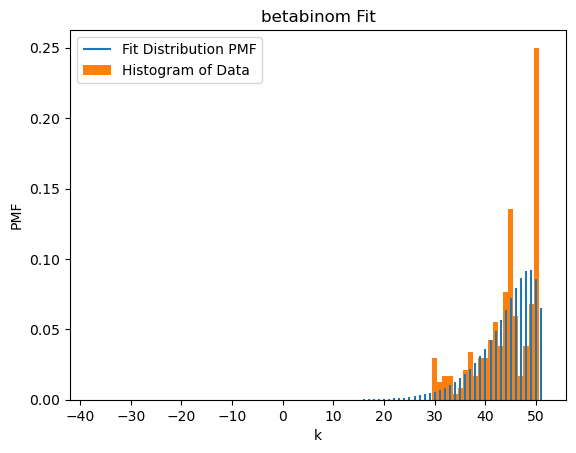

In [57]:
fig = px.histogram(previous_scoring_method_all_scores, nbins=60, histnorm='percent', labels = {"value": "Dunk Score"}, title="All Dunk Scores from 2000 - 2022")
fig.show()

dist = scipy.stats.betabinom
bounds = [(-100, 100), (-100, 100), (-100, 100), (-100, 100)]
res = scipy.stats.fit(dist, previous_scoring_method_all_scores, bounds)
print(res)
res.plot()
plt.show()

In [129]:
# create PMF of values
pmf = previous_scoring_method_all_scores.value_counts().sort_index() /len(df)
# pmf.plot(kind='bar')

print(len(previous_scoring_method_all_scores))
# create PMF with Laplace smoothing
pmf_laplace_smoothing = []
index_values = []
for i in range(1, 51, 1):
    index_values.append(i)
    count_score = np.count_nonzero(previous_scoring_method_all_scores == i)
    probability = (count_score + 1)/(len(previous_scoring_method_all_scores) + 50)
    pmf_laplace_smoothing.append(probability)

pmf_laplace_smoothing = (pd.Series(pmf_laplace_smoothing)).set_axis(index_values)
# fig = px.bar(pmf_laplace_smoothing, labels = {"value": "Probability", "index": "Dunk Score"}, title="PMF with Laplace Smoothing")
# fig.show()

fig = go.Figure()
fig.add_trace(go.Bar(x=pmf_laplace_smoothing.index.tolist(), y=pmf_laplace_smoothing, name='PMF with Laplace Smoothing'))
fig.add_trace(go.Bar(x=pmf.index.tolist(), y = pmf, name='PMF without Laplace Smoothing'))
fig.update_layout(
    title_text = "Historical Scores PMF (2000 - 2022) vs Historical Scores PMF (2000 - 2022) with Laplace Smoothing",
    xaxis_title_text = "Dunk Score",
    yaxis_title_text = "Percent",
    bargap=0.2,
    bargroupgap=0.1,
    xaxis = dict(
        tickmode = 'linear',
        dtick = 1
    )
)
fig.show()

236


In [130]:
# try a way where you pick scores +- 3 of the picked one
ITERATIONS = 100000
count = 0
conditional_scores = []
universal_population = previous_scoring_method_all_scores.tolist()

# for i in range(ITERATIONS):
#     resample = random.sample(universal_population, 1)
#     # get += 3 values
#     subset = previous_scoring_method_all_scores[(previous_scoring_method_all_scores > (resample[0] - 2)) & (previous_scoring_method_all_scores < (resample[0] + 2))]
#     resample_2 = random.sample(subset.tolist(), 4)
#     resample = resample + resample_2
#     # get mean of sample
#     conditional_scores.append(statistics.mean(resample))

# try new method with Laplace smoothing
for i in range(ITERATIONS):
    resample = np.random.choice(pmf_laplace_smoothing.index.to_list(), 1, p=pmf_laplace_smoothing.to_list())
    # get += 3 values
    subset = pmf_laplace_smoothing[(pmf_laplace_smoothing.index >= (resample[0] - 2)) & (pmf_laplace_smoothing.index <= (resample[0] + 2))]
    # create subset pmf
    subset_pmf = subset/subset.sum()
    resample_2 = np.random.choice(subset_pmf.index.to_list(), 4, p=subset_pmf.to_list())
    resample = np.append(resample, resample_2)
    # convert resample to float
    resample = resample.astype(float)
    conditional_scores.append(statistics.mean(resample))

# get variance of medians
print(np.var(conditional_scores, ddof=1))
print(np.var(universal_population))
conditional_scores_mean = statistics.mean(conditional_scores)
print(conditional_scores_mean)


112.21771914896749
30.852538781959208
40.874832


In [132]:
fig = px.histogram(conditional_scores, nbins=1000, histnorm='percent', labels = {"value": "Dunk Score"}, title="Bootstrapped Dist")
fig.show()

fig = go.Figure()
fig.add_trace(go.Histogram(x= conditional_scores, nbinsx = 200, histnorm='percent', name='Bootstrapped'))
fig.add_trace(go.Histogram(x=previous_scoring_method_all_scores, histnorm='percent', name='Historical scores'))
fig.update_layout(
    title_text = "Old Method Scores (2000 - 2022) vs Bootstrapped Scores for New Method",
    xaxis_title_text = "Dunk Score",
    yaxis_title_text = "Percent",
    bargap=0.2,
    bargroupgap=0.1,
    xaxis = dict(
        tickmode = 'linear',
        dtick = 1
    )
)
fig.show()